In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel(r"/content/Data_file (1).xlsx",header=2)


Reading Dataset

In [3]:
df

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...,...
1333,1334,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1334,1335,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1335,1336,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686
1336,1337,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949


In [4]:
df=df.drop("S.No.",axis=1)
df.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


Data Visualization

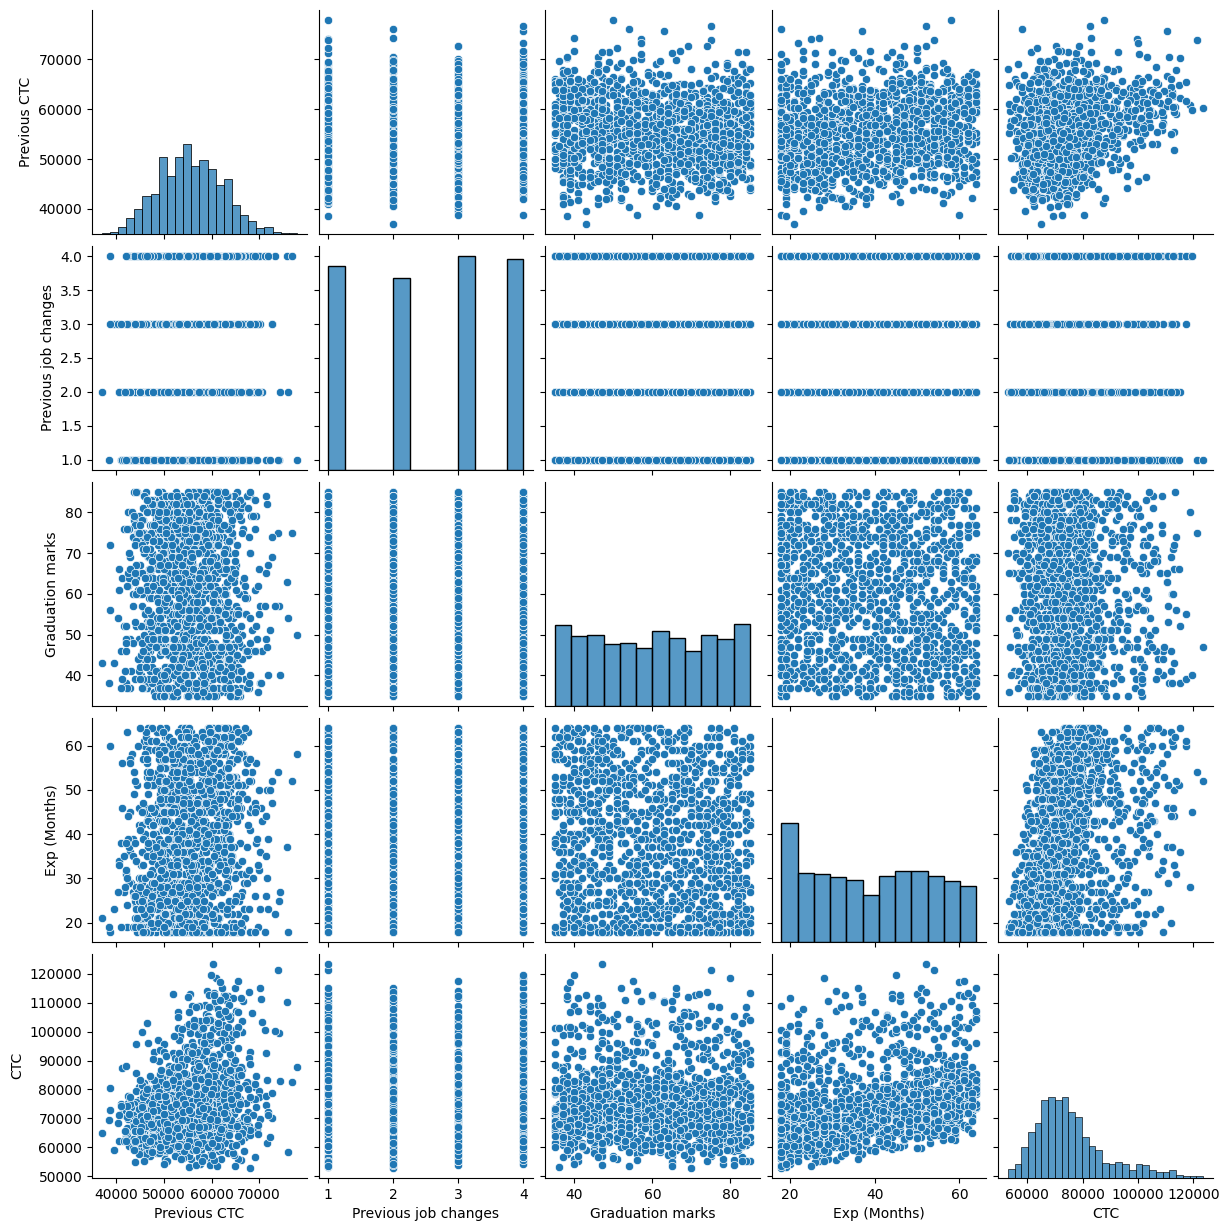

In [6]:
sns.pairplot(df)


Converting Categorical values into Numerical Values

In [7]:
df=pd.get_dummies(df,drop_first=True)
df

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,71406.576531,0,0,1,1
1,57081,1,84,18,68005.870631,1,0,0,0
2,60347,2,52,28,76764.020277,1,0,0,0
3,49010,2,81,33,82092.386880,0,1,0,0
4,57879,4,74,32,73878.097729,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,59661,4,68,50,69712.403655,0,1,0,0
1334,53714,1,67,18,69298.750099,0,0,0,1
1335,61957,1,47,18,66397.770686,1,0,0,1
1336,53203,3,69,21,64044.382949,0,0,0,1


Visualization through Heatmap

<Axes: >

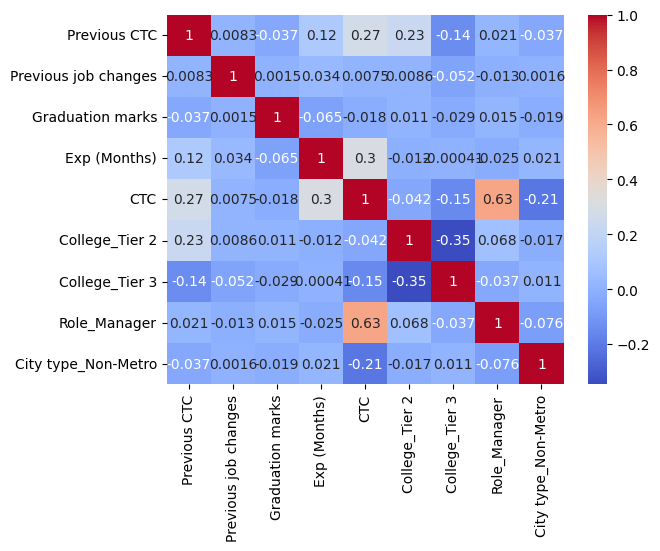

In [8]:
sns.heatmap(df.corr(),cmap="coolwarm",linecolor="white",annot=True)


In [9]:
from sklearn.linear_model import LinearRegression

Training of Linear Regression Model

In [10]:
x_train=df.drop("CTC",axis=1)
y_train=df["CTC"]
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Reading Testing Dataset

In [11]:
df_test=pd.read_excel(r"/content/Test_data_file (1).xlsx")
df_test

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,0,0,0,1,59661,4,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1334,Tier 1,Executive,Non-Metro,1,0,0,0,53714,1,67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,Tier 2,Executive,Non-Metro,0,1,0,0,61957,1,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,Tier 1,Executive,Non-Metro,1,0,0,0,53203,3,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning Testing Data Set

In [12]:
df_test=df_test.drop(["College_T1","College_T2","Role_Manager","City_Metro","Unnamed: 13","Unnamed: 14", "Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20","Unnamed: 21","Unnamed: 22","Unnamed: 23","Predicted CTC"], axis = 1)
df_test.rename(columns={"previous CTC": "Previous CTC", "previous job changes": "Previous job changes", "Exp": "Exp (Months)"}, inplace=True)
df_test.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Actual CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


Converting categorical values into Numerical Values

In [13]:
df_test=pd.get_dummies(df_test,drop_first=True)
df_test

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Actual CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,71406.576531,0,0,1,1
1,57081,1,84,18,68005.870631,1,0,0,0
2,60347,2,52,28,76764.020277,1,0,0,0
3,49010,2,81,33,82092.386880,0,1,0,0
4,57879,4,74,32,73878.097729,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,59661,4,68,50,69712.403655,0,1,0,0
1334,53714,1,67,18,69298.750099,0,0,0,1
1335,61957,1,47,18,66397.770686,1,0,0,1
1336,53203,3,69,21,64044.382949,0,0,0,1


In [14]:
df_test.shape

(1338, 9)

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Previous CTC          1338 non-null   int64  
 1   Previous job changes  1338 non-null   int64  
 2   Graduation marks      1338 non-null   int64  
 3   Exp (Months)          1338 non-null   int64  
 4   Actual CTC            1338 non-null   float64
 5   College_Tier 2        1338 non-null   uint8  
 6   College_Tier 3        1338 non-null   uint8  
 7   Role_Manager          1338 non-null   uint8  
 8   City type_Non-Metro   1338 non-null   uint8  
dtypes: float64(1), int64(4), uint8(4)
memory usage: 57.6 KB


Testing of Linear Rgression Mode

In [16]:
X_test=df_test.drop('Actual CTC',axis=1)
y_test=df_test['Actual CTC']

Predictions from the model

In [17]:
pred = model.predict(X_test)

Model Evaluation

In [18]:
from sklearn.metrics import mean_squared_error


Mean Square value

In [19]:
print("Mean squared error =", mean_squared_error(y_test,pred))

Mean squared error = 61677937.04530962


In [20]:
predicted_df=pd.concat([df_test, pd.DataFrame(pred, columns=["Predicted CTC"])], axis=1)


In [21]:
predicted_df=predicted_df[["College_Tier 2", "College_Tier 3", "City type_Non-Metro", "Graduation marks", "Previous job changes", "Role_Manager", "Exp (Months)" ,"Previous CTC", "Actual CTC","Predicted CTC"]]


Predicted values in Data Fram

In [22]:
predicted_df

,College_Tier 2,College_Tier 3,City type_Non-Metro,Graduation marks,Previous job changes,Role_Manager,Exp (Months),Previous CTC,Actual CTC,Predicted CTC
0,0,0,1,66,3,1,19,55523,71406.576531,86123.938140
1,1,0,0,84,1,0,18,57081,68005.870631,65789.546527
2,1,0,0,52,2,0,28,60347,76764.020277,69941.690302
3,0,1,0,81,2,0,33,49010,82092.386880,66843.038384
4,0,1,0,74,4,0,32,57879,73878.097729,70556.761762
...,...,...,...,...,...,...,...,...,...,...
1333,0,1,0,68,4,0,50,59661,69712.403655,76044.346371
1334,0,0,1,67,1,0,18,53714,69298.750099,65742.551372
1335,1,0,1,47,1,0,18,61957,66397.770686,64046.074448
1336,0,0,1,69,3,0,21,53203,64044.382949,66223.222343
